# How to get a Value Tile with Sorbetto? 

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sorbetto.performance.two_class_classification_performance import (
    TwoClassClassificationPerformance,
)
from sorbetto.flavor.value_flavor import ValueFlavor
from sorbetto.tile.value_tile import ValueTile
from sorbetto.parameterization.parameterization_default import ParameterizationDefault

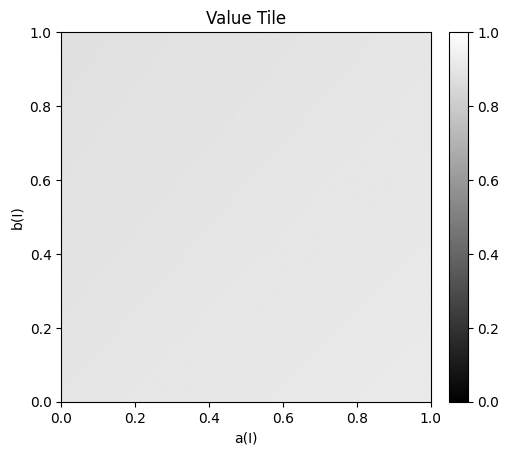

In [3]:
# Define the performance
proba_tn = 0.4
proba_fp = 0.045
proba_fn = 0.055
proba_tp = 0.5

# Create a performance object
performance = TwoClassClassificationPerformance(
    ptn=proba_tn, pfp=proba_fp, pfn=proba_fn, ptp=proba_tp
)

# Create the flavor object
flavor = ValueFlavor(performance=performance)

# Create the tile object
tile = ValueTile(
    parameterization=ParameterizationDefault(),
    flavor=flavor,
)

# Draw the Value Tile
fig, ax = tile.draw()
# ax.images[-1].set_clim(0.8, 1)
plt.show()